**Preparation**

This notebook has to be run on google Colab

The following section is only about training and putting everthing in place.

We will provide you with save.zip, so there is no need to run the training for the three models

In [1]:
!git clone https://github.com/Athirhama/my_deepBayes

Cloning into 'my_deepBayes'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 184 (delta 71), reused 174 (delta 66), pack-reused 0 (from 0)
Receiving objects: 100% (184/184), 429.87 KiB | 2.22 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
cd /content/my_deepBayes/

/content/my_deepBayes


In [3]:
mkdir cifar_data

In [5]:
!wget -P cifar_data/ https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-12-11 17:59:09--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar_data/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  45.3MB/s    in 4.0s    

2025-12-11 17:59:13 (40.5 MB/s) - ‘cifar_data/cifar-10-python.tar.gz’ saved [170498071/170498071]



In [4]:
mkdir save

In [7]:
cd /content

/content


In [8]:
!mv save.zip /content/my_deepBayes/save

In [6]:
!cd /content/my_deepBayes/cifar_data/&& tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [9]:
!cd /content/my_deepBayes/save/&& unzip save.zip

Archive:  save.zip
   creating: plane_frog_conv_vae_B_128/
   creating: plane_frog_conv_vae_C_128/
   creating: plane_frog_conv_vae_F_128/
  inflating: plane_frog_conv_vae_B_128/checkpoint_0.pkl  
  inflating: plane_frog_conv_vae_C_128/checkpoint_0.pkl  
  inflating: plane_frog_conv_vae_F_128/checkpoint_0.pkl  


In [10]:
cd /content/my_deepBayes/

/content/my_deepBayes


# **Train models**

Train the GFZ model

In [ ]:
!python vae_cifar_binary.py F

2025-12-10 09:29:38.592589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765358978.625824    1804 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765358978.635453    1804 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765358978.659494    1804 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765358978.659530    1804 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765358978.659538    1804 computation_placer.cc:177] computation placer alr

Train the GBZ model

In [ ]:
!python vae_cifar_binary.py B

2025-12-10 11:48:58.564044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765367338.584392   37081 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765367338.590307   37081 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765367338.607154   37081 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765367338.607182   37081 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765367338.607186   37081 computation_placer.cc:177] computation placer alr

Train the DFZ model

In [ ]:
!python vae_cifar_binary.py C

2025-12-10 09:40:14.563450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765359614.584770    4511 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765359614.591420    4511 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765359614.606477    4511 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765359614.606505    4511 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765359614.606509    4511 computation_placer.cc:177] computation placer alr

**In distribution data vizualisation**

In [11]:
# Classes CIFAR-10
CIFAR10_CLASSES = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

print("Classes CIFAR-10 disponibles:")
for k, v in CIFAR10_CLASSES.items():
    print(f"  {k}: {v}")

Classes CIFAR-10 disponibles:
  0: airplane
  1: automobile
  2: bird
  3: cat
  4: deer
  5: dog
  6: frog
  7: horse
  8: ship
  9: truck


In [12]:
# Classes ID (In-Distribution)
ID_CLASSES = [0, 6]  # airplane, frog
print(f"Classes ID: {[CIFAR10_CLASSES[c] for c in ID_CLASSES]}")

Classes ID: ['airplane', 'frog']


In [13]:
cd /content/my_deepBayes/

/content/my_deepBayes


In [14]:
# Load ID dta
data_path = 'cifar_data/'
from utils.import_data_cifar10 import load_data_cifar10
import matplotlib.pyplot as plt
import numpy as np
X_train, X_test, Y_train, Y_test = load_data_cifar10(
    data_path, labels=ID_CLASSES, conv=True
)
dimY = Y_train.shape[1]

print(f"\Loaded data:")
print(f"  Train: {X_train.shape}, Test: {X_test.shape}")
print(f"  Classes: {dimY}")

<>:11: SyntaxWarning: invalid escape sequence '\L'
<>:11: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipython-input-970904128.py:11: SyntaxWarning: invalid escape sequence '\L'
  print(f"\Loaded data:")


\Loaded data:
  Train: (10000, 32, 32, 3), Test: (2000, 32, 32, 3)
  Classes: 2


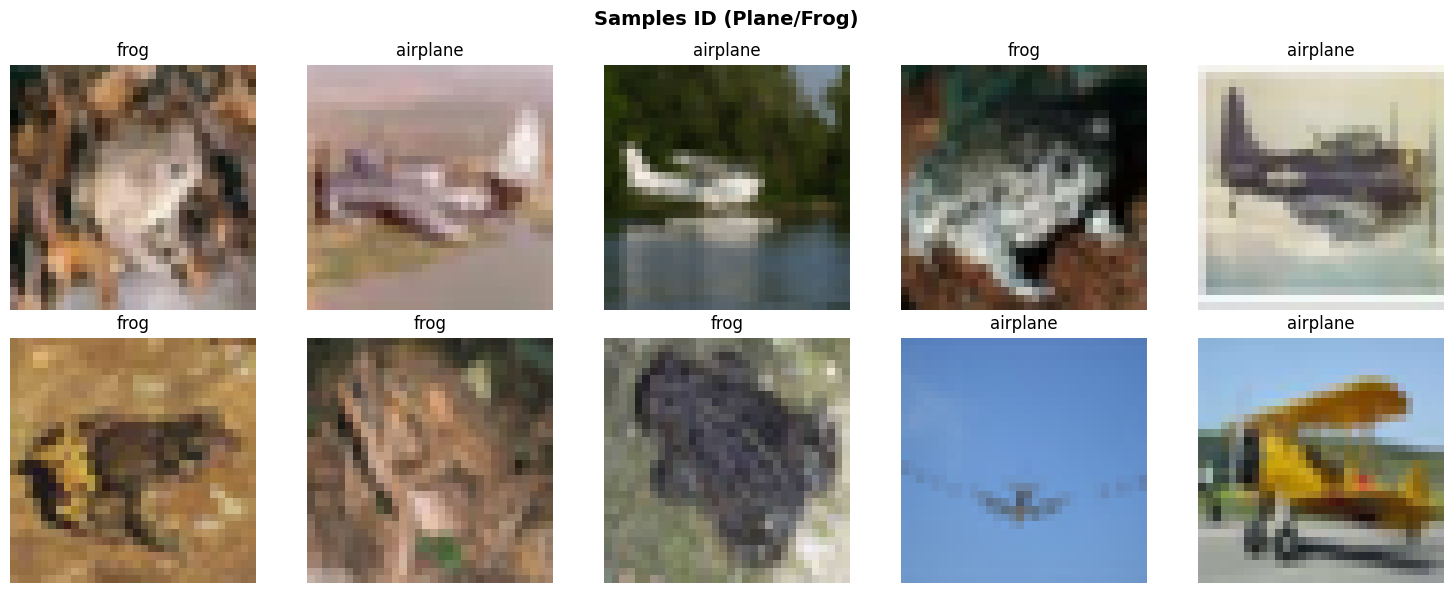

In [15]:
n_images = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(n_images):
    axes[i].imshow(X_train[i])
    class_idx = ID_CLASSES[np.argmax(Y_train[i])]
    axes[i].set_title(f'{CIFAR10_CLASSES[class_idx]}')
    axes[i].axis('off')

plt.suptitle('Samples ID (Plane/Frog)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**OOD detection using typicality**

In [16]:
cd /content/my_deepBayes/

/content/my_deepBayes


In [ ]:
# : Imports & Setup
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
from six.moves import xrange
import os, sys, pickle
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

# Configure TF for legacy v1 behavior
tf.disable_v2_behavior()


try:
    from utils.import_data_cifar10 import load_data_cifar10
except ImportError:
    print("Warning: Custom modules 'load_classifier' or 'import_data_cifar10' not found.")
    print("Please ensure you are in the correct directory or have uploaded the 'load' and 'utils' folders.")

Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
cd /content/my_deepBayes/test_attacks/

/content/my_deepBayes/test_attacks


In [19]:

try:
    from load.load_classifier import load_classifier
except ImportError:
    print("Warning: Custom modules 'load_classifier' or 'import_data_cifar10' not found.")
    print("Please ensure you are in the correct directory or have uploaded the 'load' and 'utils' folders.")

In [ ]:
# Helper Functions

def compute_empirical_entropy(logit):
    """
    Computes empirical entropy: H_hat = 1/N * sum(-log p(x))
    Returns negative log-likelihood scores.
    """
    neg_logpx = -logit
    return neg_logpx

def compute_test_statistic(neg_logpx_batch, resubstitution_entropy_hat):
    """
    Computes the typicality test statistic:
    | 1/M * sum(-log p(x)) - H_hat_RESUB | = epsilon_hat
    """
    sample_entropy_hat = np.mean(neg_logpx_batch)
    epsilon_hat = np.abs(sample_entropy_hat - resubstitution_entropy_hat)
    return epsilon_hat

def compute_all_epsilon_scores(sess, y_logit_op, x_placeholder, data_x, M, H_hat_RESUB):
    """Computes epsilon_hat scores for all full M-sized batches."""
    epsilon_scores = []
    n_samples = data_x.shape[0]
    n_batches = int(n_samples / M)

    for i in xrange(n_batches):
        X_batch = data_x[i*M:(i+1)*M]
        logit_batch = sess.run(y_logit_op, feed_dict={x_placeholder: X_batch})
        neg_logpx_batch = compute_empirical_entropy(logit_batch)
        epsilon_hat = compute_test_statistic(neg_logpx_batch, H_hat_RESUB)
        epsilon_scores.append(epsilon_hat)

    return epsilon_scores, n_batches

def detect_typicality_rate_from_scores(epsilon_scores, n_batches, epsilon_alpha_M, is_ood_set=False):
    """Calculates detection rates based on the threshold."""
    if n_batches == 0:
        detection_rate = 0.0
    else:
        batches_classified_ood = np.sum(np.array(epsilon_scores) > epsilon_alpha_M)
        detection_rate = (batches_classified_ood / n_batches) * 100

    if is_ood_set:
        print(f'OOD Detection Rate (TP Rate) on {n_batches} batches: {detection_rate:.4f} %')
    else:
        print(f'False Alarm Rate (FP Rate) on {n_batches} batches: {detection_rate:.4f} %')

    return detection_rate

In [21]:
cd /content/my_deepBayes/test_attacks/   #just to make sure

[Errno 2] No such file or directory: '/content/my_deepBayes/test_attacks/ #just to make sure'
/content/my_deepBayes/test_attacks


In [ ]:

def run_typicality_test(config):
    tf.reset_default_graph()
    try:
      tf.keras.backend.clear_session()
    except:
      pass # In case Keras isn't loaded yet

    print("Graph and Keras Backend reset. Ready for clean run.")
    tf.set_random_seed(1234)
    np.random.seed(1234)

    # Session Config
    sess_config = tf.ConfigProto()
    sess_config.gpu_options.allow_growth = True
    sess = tf.Session(config=sess_config)
    print("Created TensorFlow session.")

    #  Load Data 
    img_rows, img_cols, channels = 32, 32, 3
    datapath = '../cifar_data/'

    # Load Full Data
    try:
        x_train_full, X_all_test, y_train_full, Y_all_test = load_data_cifar10(datapath, labels=None)
        # Load ID Train Data (Plane/Frog)
        x_train, _, _, _ = load_data_cifar10(datapath, labels=[0, 6])
    except NameError:
        print("Error: Data loading functions not defined. Make sure Cell 1 imports succeeded.")
        return

    # Filter Test Data
    all_labels = np.argmax(Y_all_test, axis=1)

    # ID Test Set (Plane/Frog)
    id_indices = np.where((all_labels == 0) | (all_labels == 6))[0]
    x_clean = X_all_test[id_indices]

    # OOD Test Set (Single Class from config)
    ood_idx = config['ood_class_index']
    ood_indices = np.where(all_labels == ood_idx)[0]
    x_ood = X_all_test[ood_indices]

    cifar10_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    ood_label = cifar10_names[ood_idx]

    print(f'Loaded ID Train: {x_train.shape[0]}, ID Test: {x_clean.shape[0]}')
    print(f'Loaded OOD Test (Class {ood_idx}: {ood_label}): {x_ood.shape[0]}')

    # Validation Split
    x_val = x_clean[1000:]
    x_clean = x_clean[:1000]
    M = config['batch_size']

    # Load Model 
    x_placeholder = tf.placeholder(tf.float32, shape=(M, img_rows, img_cols, channels))

    # Load your classifier
    gen = load_classifier(sess, config['guard_name'], config['data_name'])
    y_logit_op = gen.predict(x_placeholder, softmax=False)

    # Compute Entropy (Offline Step)
    def compute_logits_all(data_x):
        logits = []
        n_samples = data_x.shape[0]
        n_batch = int(n_samples / M)

        for i in xrange(n_batch):
            X_batch = data_x[i*M:(i+1)*M]
            logits.append(sess.run(y_logit_op, feed_dict={x_placeholder: X_batch}))

        return np.concatenate(logits, 0)

    print("\nComputing training logits...")
    y_logit_train = compute_logits_all(x_train)
    neg_logpx_train = compute_empirical_entropy(y_logit_train)
    H_hat_RESUB = np.mean(neg_logpx_train)
    print(f'Resubstitution Entropy Estimate (H_hat_RESUB): {H_hat_RESUB:.3f}')

    # Bootstrap (Threshold Setting) 
    print(f'Computing Bootstrap (K={config["K_bootstrap"]}, M={M})...')
    epsilon_hat_bootstrap = []
    n_val = x_val.shape[0]

    for k in xrange(config['K_bootstrap']):
        idx = np.random.choice(n_val, size=M, replace=True)
        X_k_prime = x_val[idx]
        logit_k = sess.run(y_logit_op, feed_dict={x_placeholder: X_k_prime})
        neg_logpx_k = compute_empirical_entropy(logit_k)
        epsilon_hat_k = compute_test_statistic(neg_logpx_k, H_hat_RESUB)
        epsilon_hat_bootstrap.append(epsilon_hat_k)

    epsilon_alpha_M = np.quantile(epsilon_hat_bootstrap, config['alpha'])
    print(f'Rejection Threshold: {epsilon_alpha_M:.3f}')

    # Detection (Online Step)
    id_scores, n_id = compute_all_epsilon_scores(sess, y_logit_op, x_placeholder, x_clean, M, H_hat_RESUB)
    ood_scores, n_ood = compute_all_epsilon_scores(sess, y_logit_op, x_placeholder, x_ood, M, H_hat_RESUB)

    detect_typicality_rate_from_scores(id_scores, n_id, epsilon_alpha_M, False)
    detect_typicality_rate_from_scores(ood_scores, n_ood, epsilon_alpha_M, True)

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(ood_scores, bins=50, density=True, alpha=0.6, label=f'OOD ({ood_label})', color='red')
    plt.hist(id_scores, bins=50, density=True, alpha=0.6, label='ID (Plane/Frog)', color='blue')
    plt.axvline(epsilon_alpha_M, color='k', linestyle='--', linewidth=2, label='Threshold')

    plt.xlabel('Typicality Score')
    plt.ylabel('Frequency')
    plt.title(f'Typicality Scores (M={M})')
    plt.legend()
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    sess.close()


OOD detection for GFZ

Graph and Keras Backend reset. Ready for clean run.
Created TensorFlow session.
Loaded ID Train: 10000, ID Test: 2000
Loaded OOD Test (Class 1: car): 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_F_128/
param loaded 25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



loaded parameters from ../save/plane_frog_conv_vae_F_128/checkpoint_0.pkl
use 10 samples

Computing training logits...
Resubstitution Entropy Estimate (H_hat_RESUB): 66.808
Computing Bootstrap (K=1000, M=10)...
Rejection Threshold: 15.598
False Alarm Rate (FP Rate) on 100 batches: 3.0000 %
OOD Detection Rate (TP Rate) on 100 batches: 99.0000 %


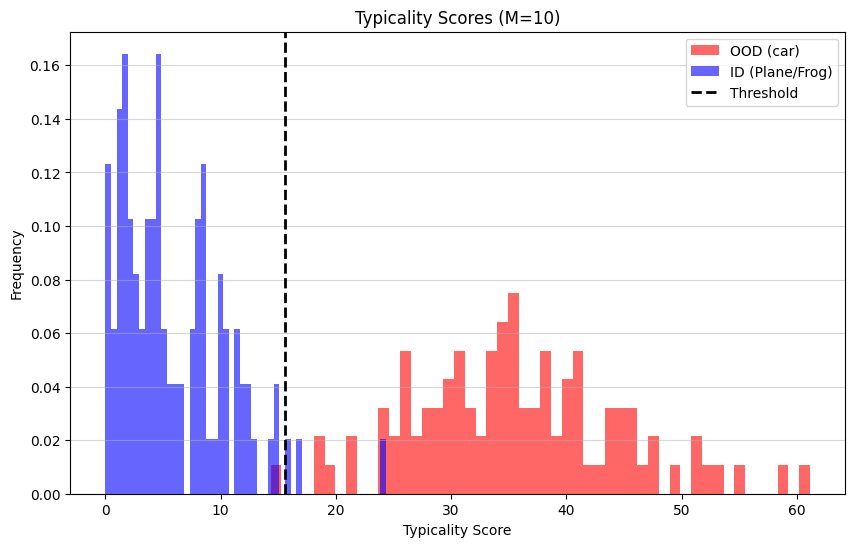

In [23]:
# Configuration Parameters

CONFIG_F = {
    'batch_size': 10,       # M in the paper
    'data_name': 'plane_frog',
    'guard_name': 'bayes_K10_F', #for the GFZ model
    'save_results': False,
    'alpha': 0.95,           # Confidence level
    'K_bootstrap': 1000,     # Number of bootstrap samples
    'ood_class_index': 1,    # 1 = Car (See list below for others)
}

# CIFAR-10 Class Reference:
# 0: plane, 1: car, 2: bird, 3: cat, 4: deer,
# 5: dog, 6: frog, 7: horse, 8: ship, 9: truck
# Run the function with our config
run_typicality_test(CONFIG_F)

Graph and Keras Backend reset. Ready for clean run.
Created TensorFlow session.
Loaded ID Train: 10000, ID Test: 2000
Loaded OOD Test (Class 2: bird): 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_F_128/
param loaded 25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loaded parameters from ../save/plane_frog_conv_vae_F_128/checkpoint_0.pkl
use 10 samples

Computing training logits...
Resubstitution Entropy Estimate (H_hat_RESUB): 66.797
Computing Bootstrap (K=1000, M=10)...
Rejection Threshold: 16.355
False Alarm Rate (FP Rate) on 100 batches: 2.0000 %
OOD Detection Rate (TP Rate) on 100 batches: 11.0000 %


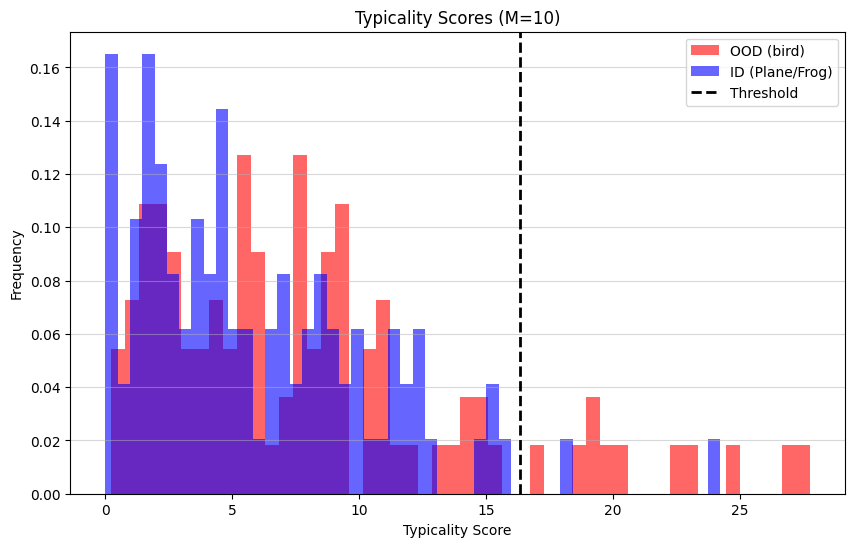

In [60]:
# Configuration Parameters

CONFIG_F_2 = {
    'batch_size': 10,       # M in the paper
    'data_name': 'plane_frog',
    'guard_name': 'bayes_K10_F', #for the GFZ model
    'save_results': False,
    'alpha': 0.95,           # Confidence level
    'K_bootstrap': 1000,     # Number of bootstrap samples
    'ood_class_index': 2,    # 1 = Car (See list below for others)
}

# CIFAR-10 Class Reference:
# 0: plane, 1: car, 2: bird, 3: cat, 4: deer,
# 5: dog, 6: frog, 7: horse, 8: ship, 9: truck
# Run the function with our config
run_typicality_test(CONFIG_F_2)

OOD detection for GBZ

Graph and Keras Backend reset. Ready for clean run.
Created TensorFlow session.
Loaded ID Train: 10000, ID Test: 2000
Loaded OOD Test (Class 1: car): 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_B_128/
param loaded 23


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loaded parameters from ../save/plane_frog_conv_vae_B_128/checkpoint_0.pkl
use 10 samples

Computing training logits...
Resubstitution Entropy Estimate (H_hat_RESUB): 68.420
Computing Bootstrap (K=1000, M=10)...
Rejection Threshold: 16.472
False Alarm Rate (FP Rate) on 100 batches: 3.0000 %
OOD Detection Rate (TP Rate) on 100 batches: 99.0000 %


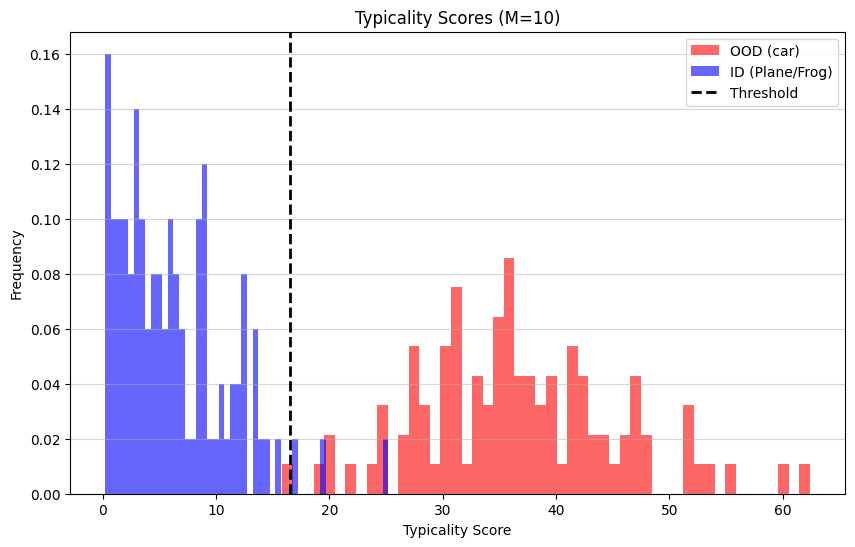

In [61]:
# Configuration Parameters

CONFIG_B = {
    'batch_size': 10,       # M in the paper
    'data_name': 'plane_frog',
    'guard_name': 'bayes_K10_B', # for the GBZ model
    'save_results': False,
    'alpha': 0.95,           # Confidence level
    'K_bootstrap': 1000,     # Number of bootstrap samples
    'ood_class_index': 1,    # 1 = Car (See list below for others)
}

# CIFAR-10 Class Reference:
# 0: plane, 1: car, 2: bird, 3: cat, 4: deer,
# 5: dog, 6: frog, 7: horse, 8: ship, 9: truck
# Run the function with our config
run_typicality_test(CONFIG_B)

Graph and Keras Backend reset. Ready for clean run.
Created TensorFlow session.
Loaded ID Train: 10000, ID Test: 2000
Loaded OOD Test (Class 2: bird): 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_B_128/
param loaded 23


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loaded parameters from ../save/plane_frog_conv_vae_B_128/checkpoint_0.pkl
use 10 samples

Computing training logits...
Resubstitution Entropy Estimate (H_hat_RESUB): 68.420
Computing Bootstrap (K=1000, M=10)...
Rejection Threshold: 16.472
False Alarm Rate (FP Rate) on 100 batches: 3.0000 %
OOD Detection Rate (TP Rate) on 100 batches: 13.0000 %


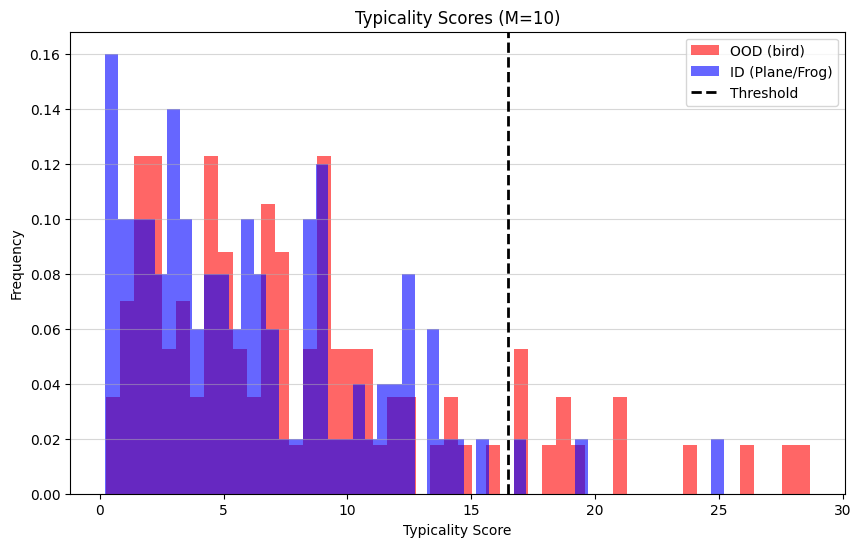

In [62]:
# Configuration Parameters

CONFIG_B_2 = {
    'batch_size': 10,       # M in the paper
    'data_name': 'plane_frog',
    'guard_name': 'bayes_K10_B', # for the GBZ model
    'save_results': False,
    'alpha': 0.95,           # Confidence level
    'K_bootstrap': 1000,     # Number of bootstrap samples
    'ood_class_index': 2,    # 1 = Car (See list below for others)
}

# CIFAR-10 Class Reference:
# 0: plane, 1: car, 2: bird, 3: cat, 4: deer,
# 5: dog, 6: frog, 7: horse, 8: ship, 9: truck
# Run the function with our config
run_typicality_test(CONFIG_B_2)

OOD detection for DFZ

Graph and Keras Backend reset. Ready for clean run.
Created TensorFlow session.
Loaded ID Train: 10000, ID Test: 2000
Loaded OOD Test (Class 1: car): 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
generator shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_C_128/
param loaded 31
loaded parameters from ../save/plane_frog_conv_vae_C_128/checkpoint_0.pkl
use 10 samples

Computing training logits...
Resubstitution Entropy Estimate (H_hat_RESUB): 85.279
Computing Bootstrap (K=1000, M=10)...
Rejection Threshold: 18.047
False Alarm Rate (FP Rate) on 100 batches: 3.0000 %
OOD Detection Rate (TP Rate) on 100 batches: 87.0000 %


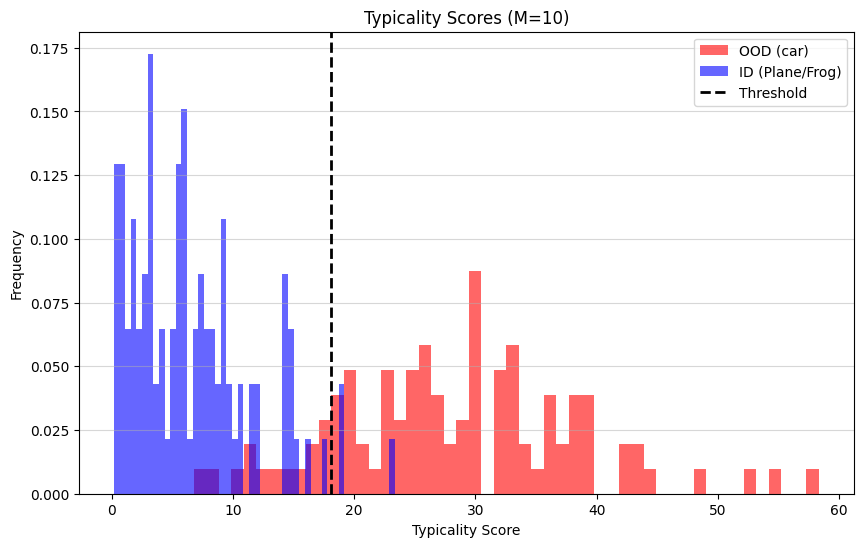

In [25]:
# Configuration Parameters

CONFIG_C = {
    'batch_size': 10,       # M in the paper
    'data_name': 'plane_frog',
    'guard_name': 'bayes_K10_C', #for the DFZ model
    'save_results': False,
    'alpha': 0.95,           # Confidence level
    'K_bootstrap': 1000,     # Number of bootstrap samples
    'ood_class_index': 1,    # 1 = Car (See list below for others)
}

# CIFAR-10 Class Reference:
# 0: plane, 1: car, 2: bird, 3: cat, 4: deer,
# 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

# Run the function with our config
run_typicality_test(CONFIG_C)

Graph and Keras Backend reset. Ready for clean run.
Created TensorFlow session.
Loaded ID Train: 10000, ID Test: 2000
Loaded OOD Test (Class 2: bird): 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
generator shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_C_128/
param loaded 31
loaded parameters from ../save/plane_frog_conv_vae_C_128/checkpoint_0.pkl
use 10 samples

Computing training logits...
Resubstitution Entropy Estimate (H_hat_RESUB): 85.279
Computing Bootstrap (K=1000, M=10)...
Rejection Threshold: 18.047
False Alarm Rate (FP Rate) on 100 batches: 3.0000 %
OOD Detection Rate (TP Rate) on 100 batches: 11.0000 %


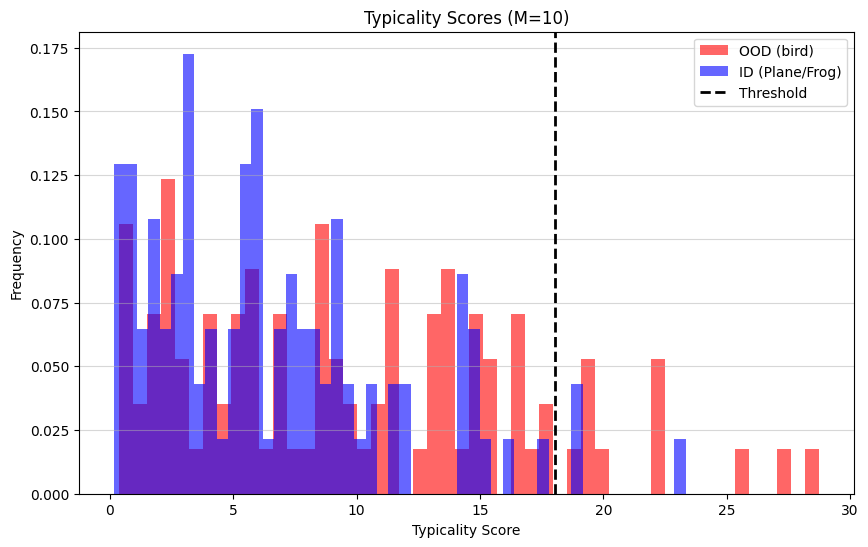

In [63]:
# Configuration Parameters

CONFIG_C_2 = {
    'batch_size': 10,       # M in the paper
    'data_name': 'plane_frog',
    'guard_name': 'bayes_K10_C', #for the DFZ model
    'save_results': False,
    'alpha': 0.95,           # Confidence level
    'K_bootstrap': 1000,     # Number of bootstrap samples
    'ood_class_index': 2,    # 1 = Car (See list below for others)
}

# CIFAR-10 Class Reference:
# 0: plane, 1: car, 2: bird, 3: cat, 4: deer,
# 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

# Run the function with our config
run_typicality_test(CONFIG_C_2)

**OOD Detection via Log-Likelihood of Logits**

In [32]:
# Helper functions
from scipy.special import logsumexp
def comp_logp(logit, y, text, comp_logit_dist=False):
    logpx = logsumexp(logit, axis=1)
    logpx_mean = np.mean(logpx)
    logpx_std = np.sqrt(np.var(logpx))

    logpxy = np.sum(y * logit, axis=1)
    logpxy_mean = []; logpxy_std = []

    for i in range(y.shape[1]):
        ind = np.where(y[:, i] == 1)[0]
        if len(ind) > 0:
            logpxy_mean.append(np.mean(logpxy[ind]))
            logpxy_std.append(np.sqrt(np.var(logpxy[ind])))

    print('%s: logp(x) = %.3f +- %.3f, logp(x|y) = %.3f +- %.3f' %
          (text, logpx_mean, logpx_std,
           np.mean(logpxy_mean) if logpxy_mean else 0,
           np.mean(logpxy_std) if logpxy_std else 0))

    return [logpx, logpx_mean, logpx_std, logpxy, logpxy_mean, logpxy_std]

def comp_detect(x, x_mean, x_std, alpha, plus):
    if plus:
        detect_rate = np.mean(x > x_mean + alpha * x_std)
    else:
        detect_rate = np.mean(x < x_mean - alpha * x_std)
    return detect_rate * 100

def search_alpha(x, x_mean, x_std, target_rate=5.0, plus=False):
    alpha_min, alpha_max, alpha_now = 0.0, 3.0, 1.5
    detect_rate = comp_detect(x, x_mean, x_std, alpha_now, plus)
    T = 0
    while np.abs(detect_rate - target_rate) > 0.01 and T < 20:
        if detect_rate > target_rate:
            alpha_min = alpha_now
        else:
            alpha_max = alpha_now
        alpha_now = 0.5 * (alpha_min + alpha_max)
        detect_rate = comp_detect(x, x_mean, x_std, alpha_now, plus)
        T += 1
    return alpha_now, detect_rate

In [51]:
def OOD_logit(batch_size=100, guard_name='bayes_K10', data_name='plane_frog', save=False, ood_class=1):
    tf.reset_default_graph()
    try:
        tf.keras.backend.clear_session()
    except:
        pass

    print("Graph and Keras Backend reset.")
    tf.set_random_seed(1234)
    np.random.seed(1234)

    sess_config = tf.ConfigProto()
    sess_config.gpu_options.allow_growth = True
    sess = tf.Session(config=sess_config)
    print("Created TensorFlow session.")

    # Load data
    img_rows, img_cols, channels = 32, 32, 3
    datapath = '../cifar_data/'
    x_train_full, X_all_test, y_train_full, Y_all_test = load_data_cifar10(datapath, labels=None)
    x_train, _, y_train, _ = load_data_cifar10(datapath, labels=[0,6])

    all_labels = np.argmax(Y_all_test, axis=1)
    id_indices = np.where((all_labels == 0) | (all_labels == 6))[0]
    ood_indices = np.where(all_labels == ood_class)[0]

    x_clean = X_all_test[id_indices]
    y_clean = Y_all_test[id_indices]
    x_ood = X_all_test[ood_indices]
    y_ood = Y_all_test[ood_indices]

    # Map y_clean to 2-dim one-hot
    id_label_map = {0: 0, 6: 1}
    y_clean_labels = all_labels[id_indices]
    y_clean_2dim = np.zeros((len(y_clean_labels), 2))
    for i, label in enumerate(y_clean_labels):
        y_clean_2dim[i, id_label_map[label]] = 1.0

    print(f"ID Train: {x_train.shape[0]}, ID Test: {x_clean.shape[0]}, OOD: {x_ood.shape[0]}")

    # Load model
    x_placeholder = tf.placeholder(tf.float32, shape=(batch_size, img_rows, img_cols, channels))
    gen = load_classifier(sess, guard_name, data_name)
    y_logit_op = gen.predict(x_placeholder, softmax=False)

    # Compute logits helper
    def compute_logits_all(data_x):
        logits = []
        n_samples = data_x.shape[0]
        n_batch = int(np.ceil(n_samples / batch_size))
        for i in range(n_batch):
            X_batch = data_x[i*batch_size:(i+1)*batch_size]
            logits.append(sess.run(y_logit_op, feed_dict={x_placeholder: X_batch}))
        return np.concatenate(logits, 0)

    # Compute logits
    y_logit_train = compute_logits_all(x_train)
    y_logit_clean = compute_logits_all(x_clean)
    y_logit_ood = compute_logits_all(x_ood)

    #  Create one-hot for predicted classes (logit-based detection)
    y_pred_clean = np.zeros_like(y_logit_clean)
    pred_idx_clean = np.argmax(y_logit_clean, axis=1)
    y_pred_clean[np.arange(len(pred_idx_clean)), pred_idx_clean] = 1

    y_pred_ood = np.zeros_like(y_logit_ood)
    pred_idx_ood = np.argmax(y_logit_ood, axis=1)
    y_pred_ood[np.arange(len(pred_idx_ood)), pred_idx_ood] = 1

    # Compute Log Probabilities
    results_train = comp_logp(y_logit_train, y_train, 'Train')
    results_clean = comp_logp(y_logit_clean, y_pred_clean, 'ID Test (logit)')
    results_ood = comp_logp(y_logit_ood, y_pred_ood, 'OOD Test (logit)')

    # Detection Rate
    plus = False
    alpha, detect_rate = search_alpha(results_clean[0], results_train[1], results_train[2], plus=plus)
    detect_rate_ood = comp_detect(results_ood[0], results_train[1], results_train[2], alpha, plus=plus)

    print(f'False Positive Rate (ID rejection): {detect_rate:.4f}')
    print(f'OOD Detection Rate: {detect_rate_ood:.4f}')

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(results_ood[0], bins=50, density=True, alpha=0.6, label='OOD', color='red')
    plt.hist(results_clean[0], bins=50, density=True, alpha=0.6, label='ID', color='blue')
    plt.axvline(results_train[1] - alpha*results_train[2], color='k', linestyle='--', linewidth=2, label='Threshold')
    plt.xlabel('log p(x, y_pred)')
    plt.ylabel('Frequency')
    plt.title('OOD vs ID Logit Log-Likelihood Distribution')
    plt.legend()
    plt.show()

    sess.close()


OOD detection for GFZ

Graph and Keras Backend reset.
Created TensorFlow session.
ID Train: 10000, ID Test: 2000, OOD: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_F_128/
param loaded 25
loaded parameters from ../save/plane_frog_conv_vae_F_128/checkpoint_0.pkl
use 10 samples
Train: logp(x) = -64.789 +- 24.396, logp(x|y) = -65.059 +- 24.405
ID Test (logit): logp(x) = -65.958 +- 26.070, logp(x|y) = -66.080 +- 26.060
OOD Test (logit): logp(x) = -100.866 +- 28.554, logp(x|y) = -101.854 +- 28.689
False Positive Rate (ID rejection): 5.0000
OOD Detection Rate: 25.1000


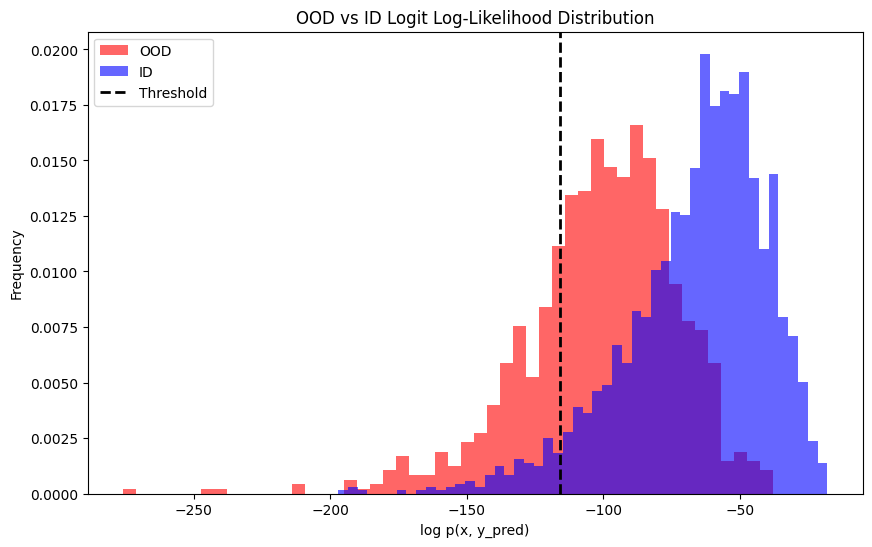

In [54]:
# Parameters
batch_size = 10
guard_name = 'bayes_K10_F'
data_name = 'plane_frog'
save_results = False
ood_class = 1

# run ood evaluation
OOD_logit(batch_size, guard_name, data_name, save_results,ood_class=ood_class)


OOD detection for GBZ

Graph and Keras Backend reset.
Created TensorFlow session.
ID Train: 10000, ID Test: 2000, OOD: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_B_128/
param loaded 23
loaded parameters from ../save/plane_frog_conv_vae_B_128/checkpoint_0.pkl
use 10 samples
Train: logp(x) = -65.266 +- 23.139, logp(x|y) = -65.440 +- 23.146
ID Test (logit): logp(x) = -67.457 +- 25.874, logp(x|y) = -67.523 +- 25.884
OOD Test (logit): logp(x) = -102.617 +- 28.321, logp(x|y) = -103.413 +- 27.879
False Positive Rate (ID rejection): 5.0000
OOD Detection Rate: 26.7000


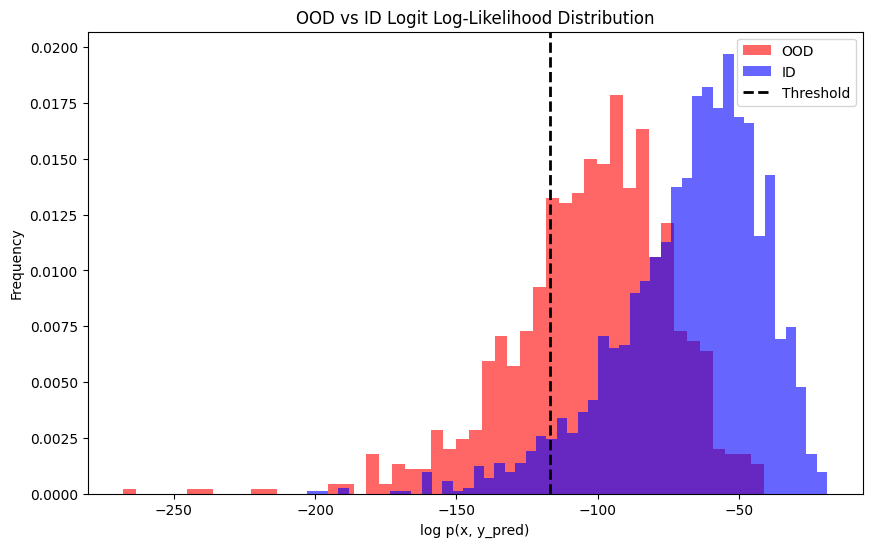

In [55]:
# Parameters
batch_size = 10
guard_name = 'bayes_K10_B'
data_name = 'plane_frog'
save_results = False
ood_class = 1

# run ood evaluation
OOD_logit(batch_size, guard_name, data_name, save_results,ood_class=ood_class)


OOD detection for DFZ

Graph and Keras Backend reset.
Created TensorFlow session.
ID Train: 10000, ID Test: 2000, OOD: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
generator shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_C_128/
param loaded 31
loaded parameters from ../save/plane_frog_conv_vae_C_128/checkpoint_0.pkl
use 10 samples
Train: logp(x) = -65.254 +- 24.885, logp(x|y) = -65.254 +- 24.812
ID Test (logit): logp(x) = -66.217 +- 26.338, logp(x|y) = -66.201 +- 26.332
OOD Test (logit): logp(x) = -101.097 +- 28.646, logp(x|y) = -102.438 +- 29.299
False Positive Rate (ID rejection): 5.0000
OOD Detection Rate: 25.1000


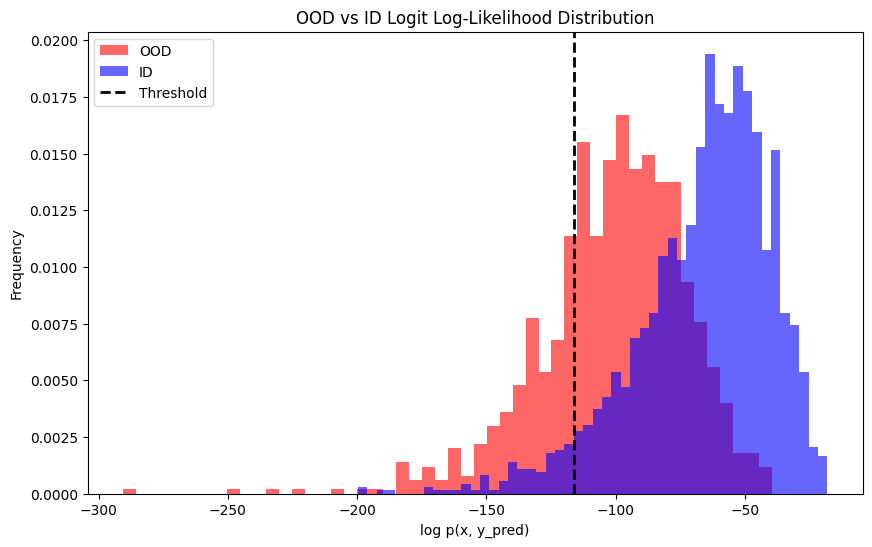

In [56]:
# Parameters
batch_size = 10
guard_name = 'bayes_K10_C'
data_name = 'plane_frog'
save_results = False
ood_class = 1

# run ood evaluation
OOD_logit(batch_size, guard_name, data_name, save_results,ood_class=ood_class)


**OOD Detection via Marginal Log-Likelihood**

In [38]:
def OOD_marginal(batch_size=100, guard_name='bayes_K10', data_name='plane_frog', save=False,ood_class=1):
    import matplotlib.pyplot as plt
    tf.reset_default_graph()
    try:
        tf.keras.backend.clear_session()
    except:
        pass

    print("Graph and Keras Backend reset.")
    tf.set_random_seed(1234)
    np.random.seed(1234)

    sess_config = tf.ConfigProto()
    sess_config.gpu_options.allow_growth = True
    sess = tf.Session(config=sess_config)
    print("Created TensorFlow session.")

    # Load data
    img_rows, img_cols, channels = 32, 32, 3
    datapath = '../cifar_data/'
    x_train_full, X_all_test, y_train_full, Y_all_test = load_data_cifar10(datapath, labels=None)
    x_train, _, y_train, _ = load_data_cifar10(datapath, labels=[0,6])

    all_labels = np.argmax(Y_all_test, axis=1)
    id_indices = np.where((all_labels == 0) | (all_labels == 6))[0]
    ood_indices = np.where(all_labels == ood_class)[0]

    x_clean = X_all_test[id_indices]
    y_clean = Y_all_test[id_indices]
    x_ood = X_all_test[ood_indices]
    y_ood = Y_all_test[ood_indices]

    # Map y_clean to 2-dim one-hot
    id_label_map = {0: 0, 6: 1}
    y_clean_labels = all_labels[id_indices]
    y_clean_2dim = np.zeros((len(y_clean_labels), 2))
    for i, label in enumerate(y_clean_labels):
        y_clean_2dim[i, id_label_map[label]] = 1.0

    print(f"ID Train: {x_train.shape[0]}, ID Test: {x_clean.shape[0]}, OOD: {x_ood.shape[0]}")

    # Load model
    x_placeholder = tf.placeholder(tf.float32, shape=(batch_size, img_rows, img_cols, channels))
    gen = load_classifier(sess, guard_name, data_name)
    y_logit_op = gen.predict(x_placeholder, softmax=False)

    # Compute logits helper
    def compute_logits_all(data_x):
        logits = []
        n_samples = data_x.shape[0]
        n_batch = int(n_samples / batch_size)
        for i in range(n_batch):
            X_batch = data_x[i*batch_size:(i+1)*batch_size]
            logits.append(sess.run(y_logit_op, feed_dict={x_placeholder: X_batch}))
        return np.concatenate(logits, 0)

    # Compute logits
    y_logit_train = compute_logits_all(x_train)
    y_logit_clean = compute_logits_all(x_clean)
    y_logit_ood = compute_logits_all(x_ood)

    # Compute marginal log-probabilities
    results_train = comp_logp(y_logit_train, y_train, 'Train')
    results_clean = comp_logp(y_logit_clean, y_clean_2dim, 'ID Test')
    results_ood = comp_logp(y_logit_ood, y_ood[:, :2], 'OOD Test')

    # Detection Rate based on marginal log-likelihood
    # For marginal likelihood, OOD usually has low logp(x)
    plus = False
    alpha, fp_rate = search_alpha(results_clean[0], results_train[1], results_train[2], plus=plus)
    tp_rate_ood = comp_detect(results_ood[0], results_train[1], results_train[2], alpha, plus=plus)

    print(f'False Positive Rate (ID rejection, marginal): {fp_rate:.4f}')
    print(f'OOD Detection Rate (marginal): {tp_rate_ood:.4f}')

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(results_ood[0], bins=50, density=True, alpha=0.6, label='OOD', color='red')
    plt.hist(results_clean[0], bins=50, density=True, alpha=0.6, label='ID', color='blue')
    plt.axvline(results_train[1] - alpha*results_train[2], color='k', linestyle='--', linewidth=2, label='Threshold')
    plt.xlabel('log p(x) (marginal)')
    plt.ylabel('Frequency')
    plt.title('OOD vs ID Log-Likelihood (Marginal)')
    plt.legend()
    plt.show()

    sess.close()


OOD for GFZ

Graph and Keras Backend reset.
Created TensorFlow session.
ID Train: 10000, ID Test: 2000, OOD: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_F_128/
param loaded 25
loaded parameters from ../save/plane_frog_conv_vae_F_128/checkpoint_0.pkl
use 10 samples
Train: logp(x) = -64.789 +- 24.396, logp(x|y) = -65.059 +- 24.405
ID Test: logp(x) = -65.958 +- 26.070, logp(x|y) = -66.253 +- 26.126
OOD Test: logp(x) = -100.866 +- 28.554, logp(x|y) = -103.106 +- 28.478
False Positive Rate (ID rejection, marginal): 5.0000
OOD Detection Rate (marginal): 25.1000


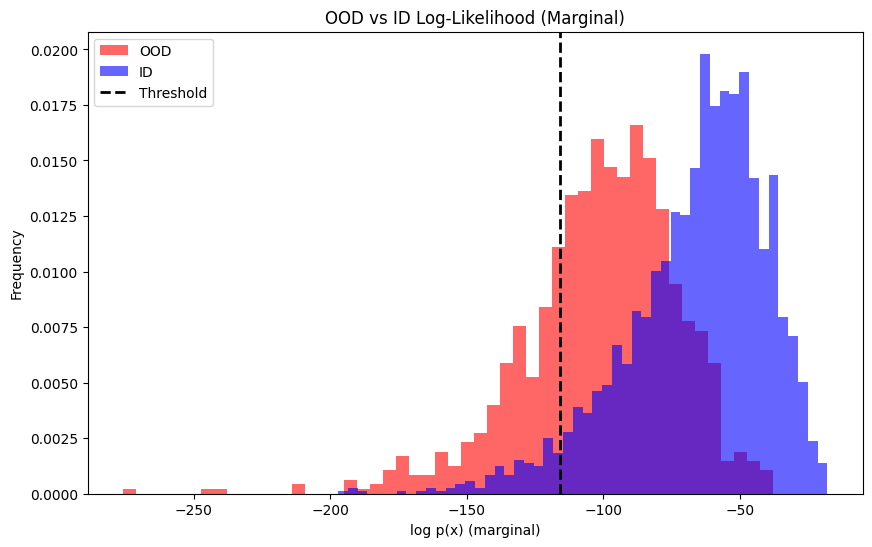

In [44]:
# Parameters
batch_size = 10
guard_name = 'bayes_K10_F'
data_name = 'plane_frog'
save_results = False
ood_class = 1

OOD_marginal(batch_size, guard_name, data_name, save_results,ood_class=ood_class)


OOD for GBZ

Graph and Keras Backend reset.
Created TensorFlow session.
ID Train: 10000, ID Test: 2000, OOD: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_B_128/
param loaded 23
loaded parameters from ../save/plane_frog_conv_vae_B_128/checkpoint_0.pkl
use 10 samples
Train: logp(x) = -65.266 +- 23.139, logp(x|y) = -65.440 +- 23.146
ID Test: logp(x) = -67.457 +- 25.874, logp(x|y) = -67.696 +- 25.967
OOD Test: logp(x) = -102.617 +- 28.321, logp(x|y) = -105.979 +- 28.601
False Positive Rate (ID rejection, marginal): 5.0000
OOD Detection Rate (marginal): 26.7000


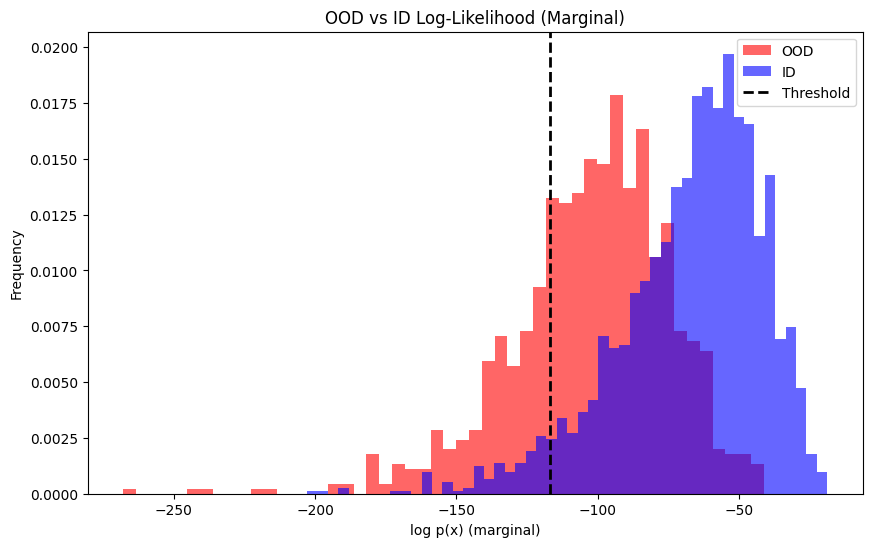

In [45]:
# Parameters
batch_size = 10
guard_name = 'bayes_K10_B'
data_name = 'plane_frog'
save_results = False
ood_class=1

OOD_marginal(batch_size, guard_name, data_name, save_results,ood_class=ood_class)


OOD for DFZ

Graph and Keras Backend reset.
Created TensorFlow session.
ID Train: 10000, ID Test: 2000, OOD: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
generator shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_C_128/
param loaded 31
loaded parameters from ../save/plane_frog_conv_vae_C_128/checkpoint_0.pkl
use 10 samples
Train: logp(x) = -65.254 +- 24.885, logp(x|y) = -65.254 +- 24.812
ID Test: logp(x) = -66.217 +- 26.338, logp(x|y) = -66.747 +- 26.826
OOD Test: logp(x) = -101.097 +- 28.646, logp(x|y) = -121.809 +- 34.632
False Positive Rate (ID rejection, marginal): 5.0000
OOD Detection Rate (marginal): 25.1000


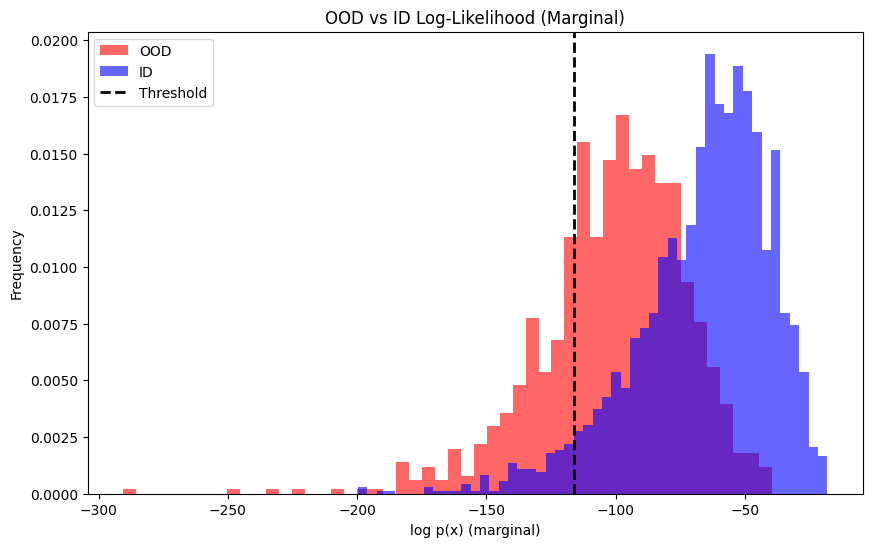

In [46]:
# Parameters
batch_size = 10
guard_name = 'bayes_K10_C'
data_name = 'plane_frog'
save_results = False
ood_class=1

OOD_marginal(batch_size, guard_name, data_name, save_results,ood_class=1)


**OOD Detection via Latent-Space KL Divergence**

In [47]:

import numpy as np
import os
import pickle
import tensorflow.compat.v1 as tf

# Configure TF for legacy v1 behavior
tf.disable_v2_behavior()

def OOD_kl(batch_size=100, guard_name='bayes_K10_C', data_name='plane_frog', save=False, ood_class=1):
    # Reset graph
    tf.reset_default_graph()
    try:
        tf.keras.backend.clear_session()
    except:
        pass
    print("Graph and Keras backend reset.")

    # Create session
    sess_config = tf.ConfigProto()
    sess_config.gpu_options.allow_growth = True
    sess = tf.Session(config=sess_config)
    tf.set_random_seed(1234)
    np.random.seed(1234)
    print("TF1 session created.")

    # Load data
    datapath = '../cifar_data/'
    x_train_full, X_all_test, y_train_full, Y_all_test = load_data_cifar10(datapath, labels=None)

    id_labels = [0, 6]  # Plane/Frog
    all_labels = np.argmax(Y_all_test, axis=1)
    id_indices = np.where((all_labels == id_labels[0]) | (all_labels == id_labels[1]))[0]
    ood_indices = np.where(all_labels == ood_class)[0]


    x_train, _, _, _ = load_data_cifar10(datapath, labels=id_labels)
    x_clean = X_all_test[id_indices]
    x_ood = X_all_test[ood_indices]

    print(f'ID train: {x_train.shape[0]}, ID test: {x_clean.shape[0]}, OOD test: {x_ood.shape[0]}')

    # Load classifier
    gen = load_classifier(sess, guard_name, data_name)  # use your TF1 sess here
    enc_conv, enc_mlp = gen.enc  # enc_conv and enc_mlp
    dimZ = 128  # latent dim used during VAE training

    # Initialize all variables to avoid "FailedPreconditionError"
    sess.run(tf.global_variables_initializer())
    print("All TF1 variables initialized.")

    # KL Divergence
    def compute_kl_all(data_x):
        kl_scores = []
        n_samples = data_x.shape[0]
        n_batch = int(np.ceil(n_samples / batch_size))

        for i in range(n_batch):
            X_batch = data_x[i*batch_size:(i+1)*batch_size]
            X_batch = X_batch.astype(np.float32)
            N = X_batch.shape[0]

            # Compute conv features
            fea = sess.run(enc_conv(X_batch))

            # Compute mean and logvar (pass dummy y if required)
            y_dummy = np.zeros((N, 2), dtype=np.float32)
  # 2 classes for Plane/Frog, adjust if needed
            mean_z, logvar_z = sess.run(enc_mlp(fea, y_dummy))

            kl = 0.5 * np.sum(np.exp(logvar_z) + mean_z**2 - 1. - logvar_z, axis=1)
            kl_scores.append(kl)

        return np.concatenate(kl_scores, 0)

    print("Computing KL for training set...")
    kl_train = compute_kl_all(x_train)
    kl_mean = np.mean(kl_train)
    kl_std = np.std(kl_train)
    print(f"Train KL: mean={kl_mean:.3f}, std={kl_std:.3f}")

    print("Computing KL for ID test set...")
    kl_clean = compute_kl_all(x_clean)
    print("Computing KL for OOD test set...")
    kl_ood = compute_kl_all(x_ood)

    # Detection thresholds
    def comp_detect(x, x_mean, x_std, alpha, plus=True):
        if plus:
            return np.mean(x > x_mean + alpha * x_std) * 100
        else:
            return np.mean(x < x_mean - alpha * x_std) * 100

    def search_alpha(x, x_mean, x_std, target_rate=5.0, plus=True):
        alpha_min, alpha_max, alpha_now = 0.0, 3.0, 1.5
        detect_rate = comp_detect(x, x_mean, x_std, alpha_now, plus)
        T = 0
        while np.abs(detect_rate - target_rate) > 0.01 and T < 20:
            if detect_rate > target_rate:
                alpha_min = alpha_now
            else:
                alpha_max = alpha_now
            alpha_now = 0.5 * (alpha_min + alpha_max)
            detect_rate = comp_detect(x, x_mean, x_std, alpha_now, plus)
            T += 1
        return alpha_now, detect_rate

    alpha, fp_rate = search_alpha(kl_clean, kl_mean, kl_std, plus=True)
    tp_rate = comp_detect(kl_ood, kl_mean, kl_std, alpha, plus=True)

    print(f"False Positive Rate (ID rejected): {fp_rate:.3f}%")
    print(f"True Positive Rate (OOD detected): {tp_rate:.3f}%")

    results = {'FP_KL': fp_rate, 'TP_KL_OOD': tp_rate}

    # Save results
    if save:
        path = f'detection_results/{guard_name}/'
        os.makedirs(path, exist_ok=True)
        filename = path + f'{data_name}_{guard_name}_OOD_KL.pkl'
        with open(filename, 'wb') as f:
            pickle.dump(results, f)
        print(f"Results saved at {filename}")
    #  Visualization

    plt.figure(figsize=(10, 6))
    plt.hist(kl_ood, bins=50, density=True, alpha=0.6, label='OOD', color='red')
    plt.hist(kl_clean, bins=50, density=True, alpha=0.6, label='ID', color='blue')
    threshold = kl_mean + alpha * kl_std
    plt.axvline(threshold, color='k', linestyle='--', linewidth=2, label='Threshold')

    plt.xlabel('KL Divergence')
    plt.ylabel('Frequency')
    plt.title('OOD vs ID KL Divergence Distribution')
    plt.legend()
    plt.show()


    sess.close()
    return results


OOD detection for GFZ

Graph and Keras backend reset.
TF1 session created.
ID train: 10000, ID test: 2000, OOD test: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_F_128/
param loaded 25
loaded parameters from ../save/plane_frog_conv_vae_F_128/checkpoint_0.pkl
use 10 samples
All TF1 variables initialized.
Computing KL for training set...
Train KL: mean=0.042, std=0.022
Computing KL for ID test set...
Computing KL for OOD test set...
False Positive Rate (ID rejected): 5.000%
True Positive Rate (OOD detected): 1.800%


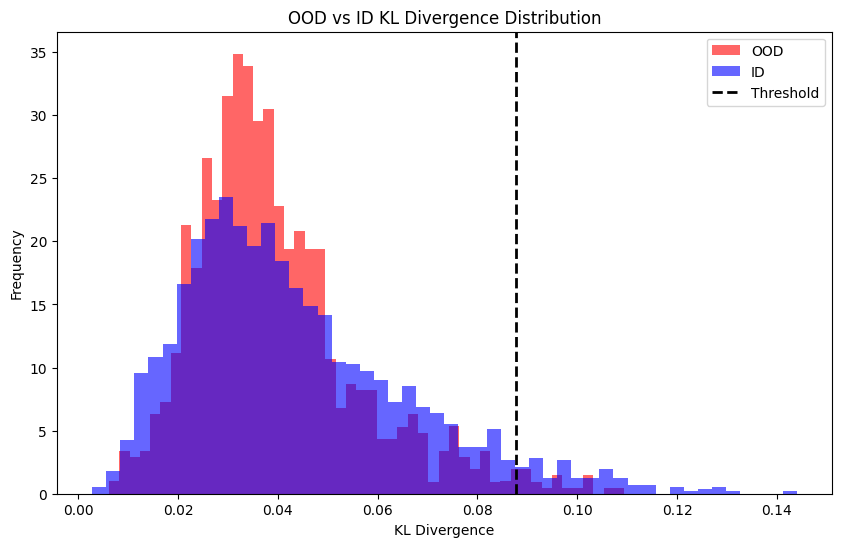

{'FP_KL': np.float64(5.0), 'TP_KL_OOD': np.float64(1.7999999999999998)}

In [57]:
OOD_kl(batch_size=100, guard_name='bayes_K10_F', data_name='plane_frog', save=False,ood_class=1)


OOD detection for GBZ

Graph and Keras backend reset.
TF1 session created.
ID train: 10000, ID test: 2000, OOD test: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_B_128/
param loaded 23
loaded parameters from ../save/plane_frog_conv_vae_B_128/checkpoint_0.pkl
use 10 samples
All TF1 variables initialized.
Computing KL for training set...
Train KL: mean=0.053, std=0.025
Computing KL for ID test set...
Computing KL for OOD test set...
False Positive Rate (ID rejected): 5.000%
True Positive Rate (OOD detected): 1.700%


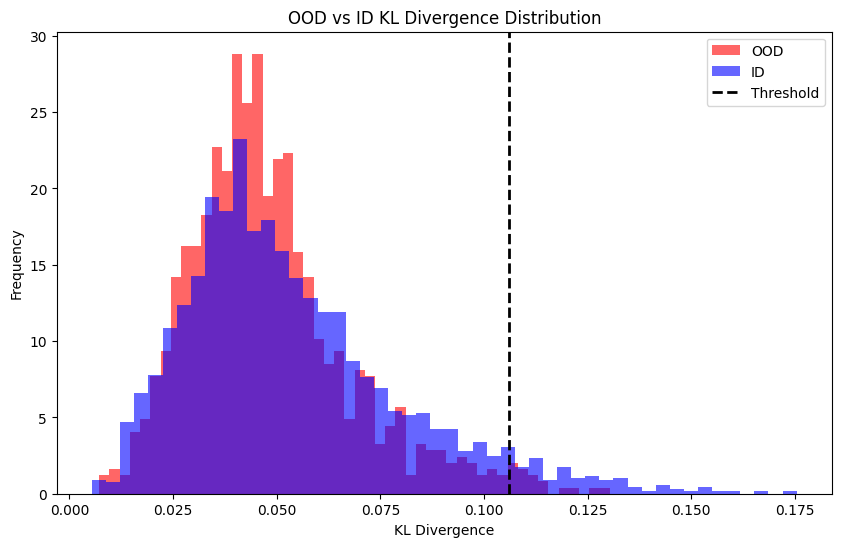

{'FP_KL': np.float64(5.0), 'TP_KL_OOD': np.float64(1.7000000000000002)}

In [58]:
OOD_kl(batch_size=100, guard_name='bayes_K10_B', data_name='plane_frog', save=False,ood_class=1)

OOD detection for DFZ

Graph and Keras backend reset.
TF1 session created.
ID train: 10000, ID test: 2000, OOD test: 1000
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
generator shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_C_128/
param loaded 31
loaded parameters from ../save/plane_frog_conv_vae_C_128/checkpoint_0.pkl
use 10 samples
All TF1 variables initialized.
Computing KL for training set...
Train KL: mean=0.038, std=0.019
Computing KL for ID test set...
Computing KL for OOD test set...
False Positive Rate (ID rejected): 5.000%
True Positive Rate (OOD detected): 1.600%


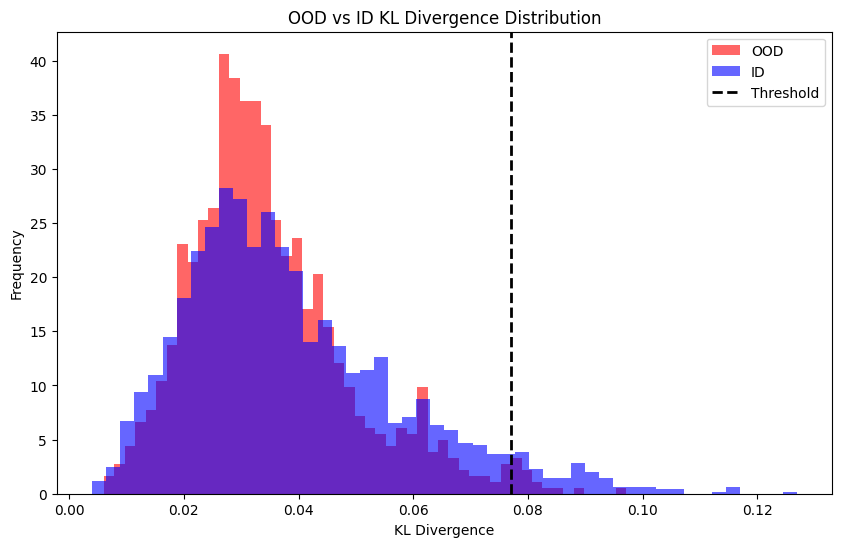

{'FP_KL': np.float64(5.0), 'TP_KL_OOD': np.float64(1.6)}

In [59]:
OOD_kl(batch_size=100, guard_name='bayes_K10_C', data_name='plane_frog', save=False,ood_class=1)

Graph and Keras backend reset.

>>> Traitement du modèle : bayes_K10_F ...
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_F_128/
param loaded 25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loaded parameters from ../save/plane_frog_conv_vae_F_128/checkpoint_0.pkl
use 10 samples
Graph and Keras backend reset.

>>> Traitement du modèle : bayes_K10_B ...
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]
encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_B_128/
param loaded 23


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loaded parameters from ../save/plane_frog_conv_vae_B_128/checkpoint_0.pkl
use 10 samples
Graph and Keras backend reset.

>>> Traitement du modèle : bayes_K10_C ...
settings:
no_z False
use_mean False
fix_samples False
attack_snapshot False
generator shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
decoder shared Conv Net of size [(4, 4, 256), (8, 8, 128), (16, 16, 64), (32, 32, 3)]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


encoder shared Conv net  network architecture: [(16, 16, 64), (8, 8, 128), (4, 4, 256)] [1000]
../save/plane_frog_conv_vae_C_128/
param loaded 31
loaded parameters from ../save/plane_frog_conv_vae_C_128/checkpoint_0.pkl
use 10 samples


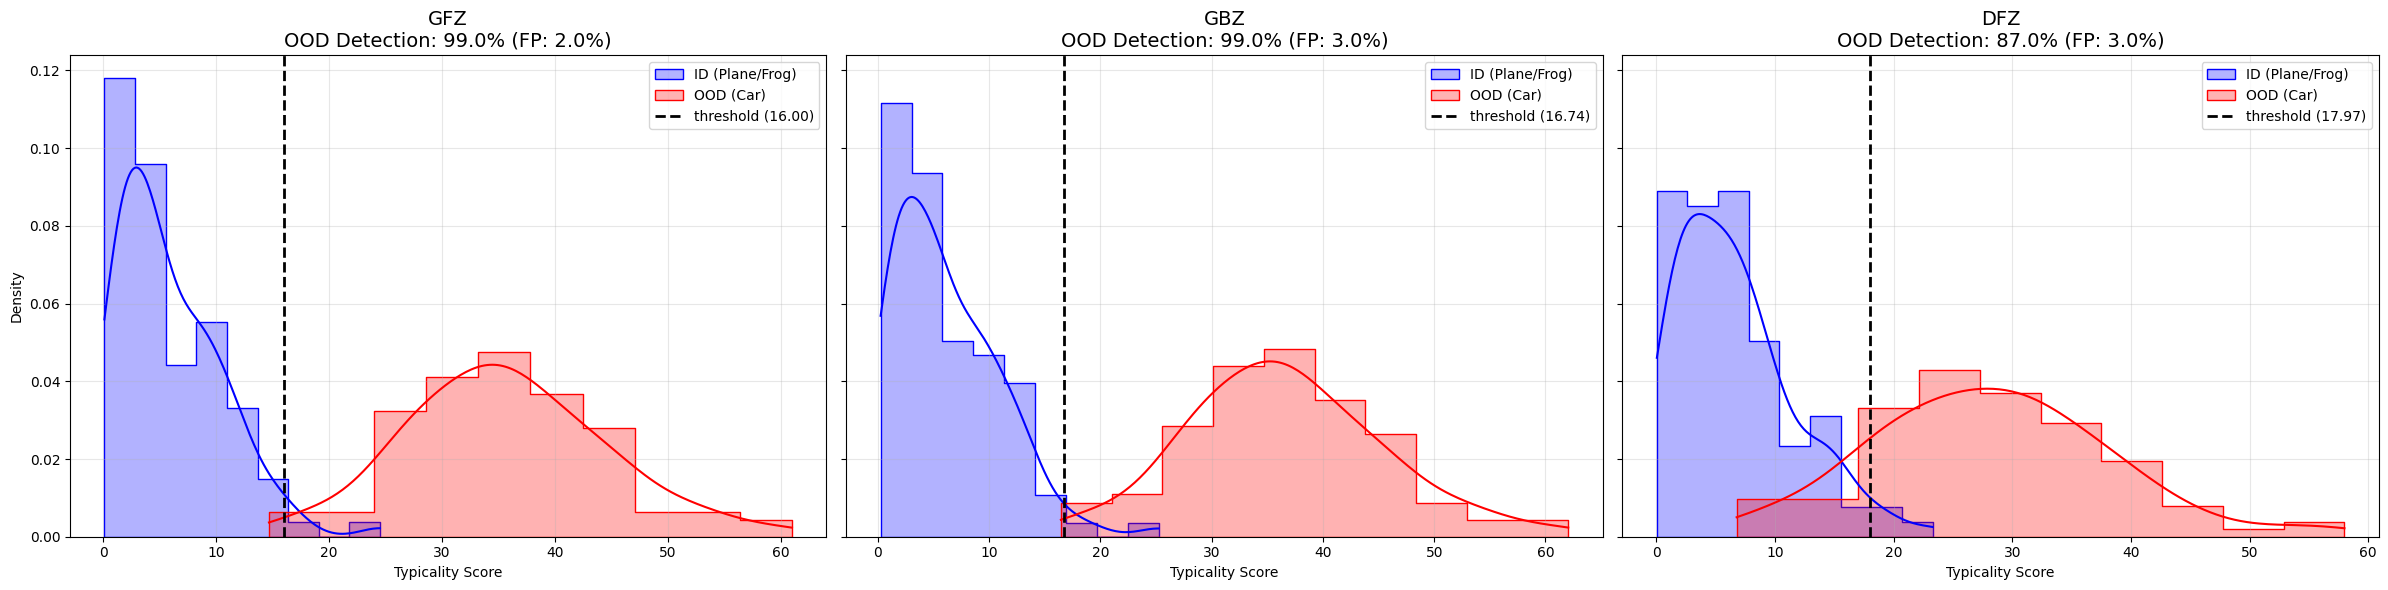


✅ Graphique généré : comparaison_3_modeles.png
Téléchargement en cours...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Pour le téléchargement

# ==========================================
# 1. CONFIGURATION DES 3 MODÈLES
# ==========================================
# Modifie cette liste avec les noms exacts de tes modèles (gardes)
# Assure-toi que les checkpoints existent dans /save/
models_to_test = [
    {'guard': 'bayes_K10_F',      'label': 'GFZ'},
    {'guard': 'bayes_K10_B',    'label': 'GBZ'},
    {'guard': 'bayes_K10_C',  'label': 'DFZ'}
]

# Paramètres communs
BATCH_SIZE = 10
ALPHA = 0.95
K_BOOTSTRAP = 1000
OOD_CLASS_IDX = 1  # Classe 2 = Bird (Oiseau) pour l'exemple

# ==========================================
# 2. FONCTIONS DE TRAITEMENT
# ==========================================
def compute_empirical_entropy(logit): return -logit
def compute_stat(nll_batch, h_hat): return np.abs(np.mean(nll_batch) - h_hat)

def get_scores_for_model(guard_name):
    tf.reset_default_graph()
    try:
        tf.keras.backend.clear_session()
    except:
        pass
    print("Graph and Keras backend reset.")

    """ Exécute tout le pipeline de typicalité pour UN modèle et retourne les scores """
    print(f"\n>>> Traitement du modèle : {guard_name} ...")

    tf.reset_default_graph()
    tf.set_random_seed(1234)
    sess = tf.Session()

    # --- Load Data ---
    # (On recharge à chaque fois pour être sûr, mais c'est rapide)
    from import_data_cifar10 import load_data_cifar10
    datapath = '/content/my_deepBayes/cifar_data/'
    x_train_full, X_all_test, _, Y_all_test = load_data_cifar10(datapath, labels=None)

    # Filtres
    id_labels = [0, 6]
    ood_labels = [OOD_CLASS_IDX]
    all_labels = np.argmax(Y_all_test, axis=1)

    id_idx = np.where(np.isin(all_labels, id_labels))[0]
    ood_idx = np.where(np.isin(all_labels, ood_labels))[0]

    x_train, _, _, _ = load_data_cifar10(datapath, labels=id_labels) # ID Train
    x_clean = X_all_test[id_idx][:1000]  # ID Test
    x_val = X_all_test[id_idx][1000:]    # ID Val
    x_ood = X_all_test[ood_idx]          # OOD Test

    # Truncate
    def trunc(d): return d[:(len(d)//BATCH_SIZE)*BATCH_SIZE]
    x_train, x_clean, x_val, x_ood = map(trunc, [x_train, x_clean, x_val, x_ood])

    # --- Load Model ---
    from load_classifier import load_classifier
    x_ph = tf.placeholder(tf.float32, shape=(BATCH_SIZE, 32, 32, 3))

    try:
        gen = load_classifier(sess, guard_name, 'plane_frog')
        y_op = gen.predict(x_ph, softmax=False)
    except Exception as e:
        print(f"❌ Erreur chargement {guard_name}: {e}")
        sess.close()
        return None, None, None

    # --- Helper interne ---
    def get_nll(data):
        res = []
        for i in range(len(data)//BATCH_SIZE):
            batch = data[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
            res.append(sess.run(y_op, feed_dict={x_ph: batch}))
        return compute_empirical_entropy(np.concatenate(res))

    # --- H_hat & Threshold ---
    nll_train = get_nll(x_train)
    H_hat = np.mean(nll_train)

    nll_val = get_nll(x_val)
    eps_boots = []
    for k in range(K_BOOTSTRAP):
        idx = np.random.choice(len(nll_val), size=BATCH_SIZE, replace=True)
        eps_boots.append(compute_stat(nll_val[idx], H_hat))
    threshold = np.quantile(eps_boots, ALPHA)

    # --- Get Final Scores ---
    # On calcule la stat pour chaque batch de test
    def get_stats(data):
        nll = get_nll(data)
        # On redécoupe par batch pour avoir la stat de typicalité
        stats = []
        for i in range(len(nll)//BATCH_SIZE):
            batch_nll = nll[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
            stats.append(compute_stat(batch_nll, H_hat))
        return np.array(stats)

    scores_id = get_stats(x_clean)
    scores_ood = get_stats(x_ood)

    sess.close()
    return scores_id, scores_ood, threshold

# ==========================================
# 3. EXÉCUTION & AFFICHAGE
# ==========================================
# Création de la figure (1 ligne, 3 colonnes)
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)
cifar_classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
ood_name = cifar_classes[OOD_CLASS_IDX]

results_data = []

for i, model_cfg in enumerate(models_to_test):
    ax = axes[i]
    name = model_cfg['guard']
    label = model_cfg['label']

    # Calculs
    s_id, s_ood, thresh = get_scores_for_model(name)

    if s_id is not None:
        # Plot
        sns.histplot(s_id, color='blue', label='ID (Plane/Frog)', kde=True, stat="density", element="step", alpha=0.3, ax=ax)
        sns.histplot(s_ood, color='red', label=f'OOD ({ood_name})', kde=True, stat="density", element="step", alpha=0.3, ax=ax)
        ax.axvline(thresh, color='black', linestyle='--', linewidth=2, label=f'threshold ({thresh:.2f})')

        # Calcul Taux de détection
        tp = np.mean(s_ood > thresh) * 100
        fp = np.mean(s_id > thresh) * 100

        ax.set_title(f"{label}\nOOD Detection: {tp:.1f}% (FP: {fp:.1f}%)", fontsize=14)
        ax.set_xlabel("Typicality Score")
        if i == 0: ax.set_ylabel("Density")
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, "Erreur Modèle", ha='center', fontsize=12)

plt.tight_layout()
filename = "comparaison_3_modeles.png"
plt.savefig(filename, dpi=300)
plt.show()

# ==========================================
# 4. TÉLÉCHARGEMENT
# ==========================================
print(f"\n✅ Graphique généré : {filename}")
print("Téléchargement en cours...")
files.download(filename)